In [5]:
%pip install -r requirements.txt

import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

import seaborn as sns

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: C:\Users\Admin\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [27]:
interest_rate = pd.read_csv('./data/immediate-term.csv')
energy_price = pd.read_csv('./data/energy_price.csv')

In [28]:
interest_rate.head()

,Subject,LOCATION,Country,Interest-Rate,Year,Month
0,"Immediate interest rates, Call Money, Interban...",AUS,Australia,5.00,2000,1
1,"Immediate interest rates, Call Money, Interban...",AUS,Australia,5.48,2000,2
2,"Immediate interest rates, Call Money, Interban...",AUS,Australia,5.50,2000,3
3,"Immediate interest rates, Call Money, Interban...",AUS,Australia,5.72,2000,4
4,"Immediate interest rates, Call Money, Interban...",AUS,Australia,5.98,2000,5


In [29]:
energy_price.head()

,Country,LOCATION,Year,Month,Thousand Dollars,Megawatthours,Count,Cents/kWh
0,United States,USA,2022,8,"25,681,962","160,974,300","140,407,601",15.95
1,United States,USA,2022,7,"25,531,114","165,125,584","139,780,608",15.46
2,United States,USA,2022,6,"21,137,852","137,055,267","140,248,613",15.42
3,United States,USA,2022,5,"16,479,018","110,482,201","138,666,308",14.92
4,United States,USA,2022,4,"14,537,713","98,449,326","139,496,067",14.77


In [30]:
df = interest_rate.merge(energy_price, on=['Country', 'Year', 'Month'])

In [31]:
#Columns present in the dataset
df.columns

Index(['Subject', 'LOCATION_x', 'Country', 'Interest-Rate', 'Year', 'Month',
       'LOCATION_y', 'Thousand Dollars', 'Megawatthours', 'Count',
       'Cents/kWh'],
      dtype='object')

In [32]:
#Checking for null values
df.isnull().sum()

Subject             0
LOCATION_x          0
Country             0
Interest-Rate       0
Year                0
Month               0
LOCATION_y          0
Thousand Dollars    0
Megawatthours       0
Count               0
Cents/kWh           0
dtype: int64

In [33]:
#Checking datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 0 to 271
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Subject           272 non-null    object 
 1   LOCATION_x        272 non-null    object 
 2   Country           272 non-null    object 
 3   Interest-Rate     272 non-null    float64
 4   Year              272 non-null    int64  
 5   Month             272 non-null    int64  
 6   LOCATION_y        272 non-null    object 
 7   Thousand Dollars  272 non-null    object 
 8   Megawatthours     272 non-null    object 
 9   Count             272 non-null    object 
 10  Cents/kWh         272 non-null    float64
dtypes: float64(2), int64(2), object(7)
memory usage: 25.5+ KB


In [34]:
#Stats of data
df.describe()

,Interest-Rate,Year,Month,Cents/kWh
count,272.000000,272.000000,272.000000,272.000000
mean,1.618934,2010.838235,6.441176,11.321213
std,1.867810,6.557405,3.446512,1.853213
min,0.050000,2000.000000,1.000000,7.660000
25%,0.130000,2005.000000,3.000000,9.760000
50%,1.000000,2011.000000,6.000000,11.830000
75%,2.292500,2016.250000,9.000000,12.790000
max,6.540000,2022.000000,12.000000,15.950000


C:\Users\Admin\AppData\Local\Temp\ipykernel_42904\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

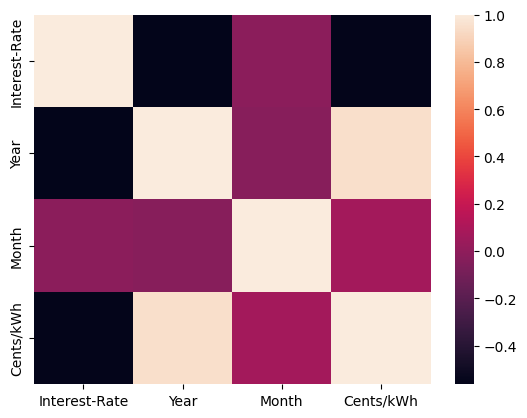

In [35]:
sns.heatmap(df.corr())

array([<AxesSubplot: xlabel='Year,Month'>], dtype=object)

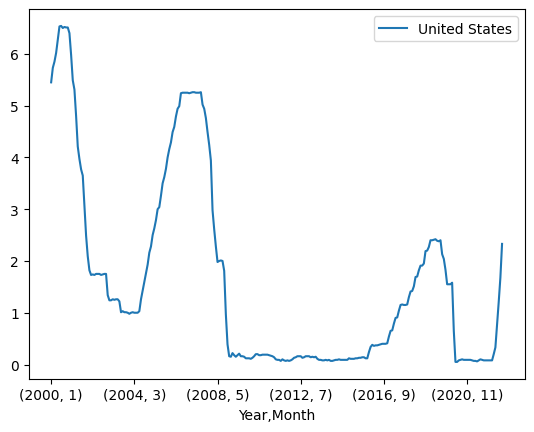

In [37]:
pd.pivot_table(df.reset_index(),
               index=['Year','Month'], columns='Country', values='Interest-Rate'
              ).plot(subplots=True)

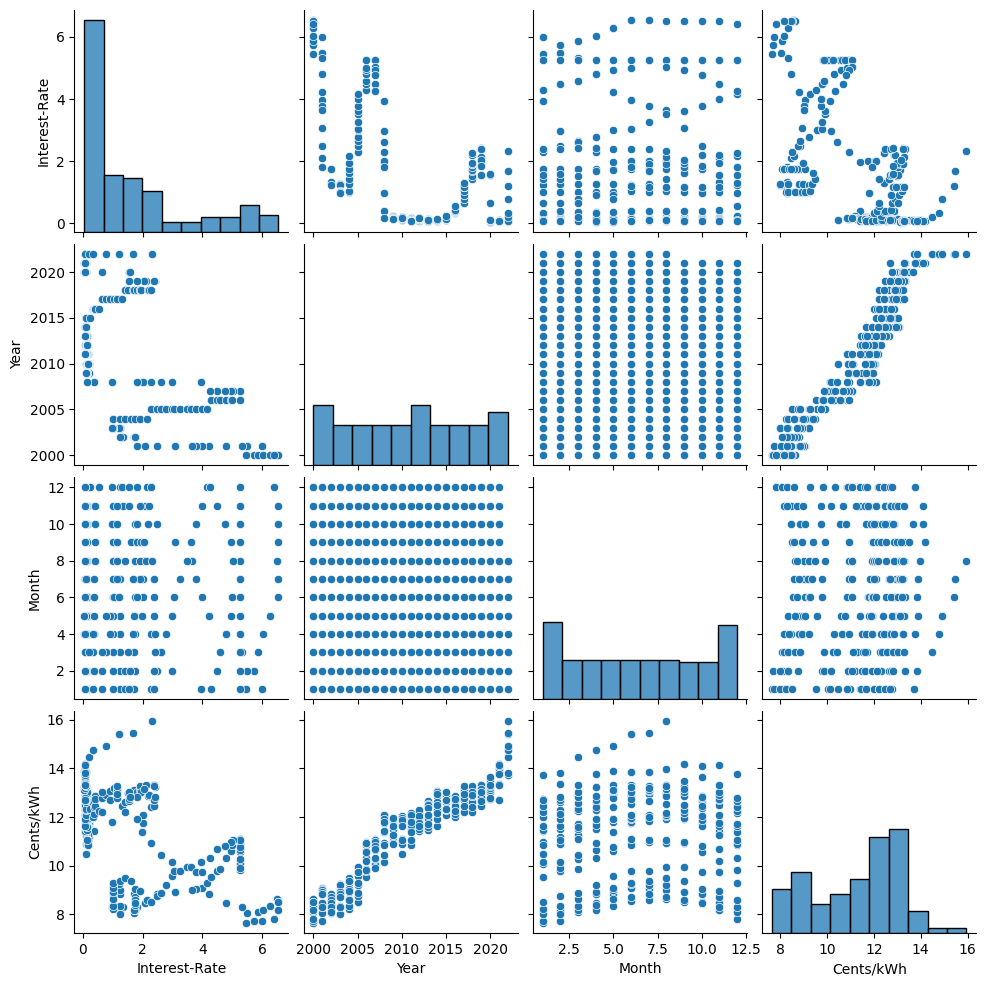

In [38]:
sns.pairplot(df)

<AxesSubplot: xlabel='Country', ylabel='Interest-Rate'>

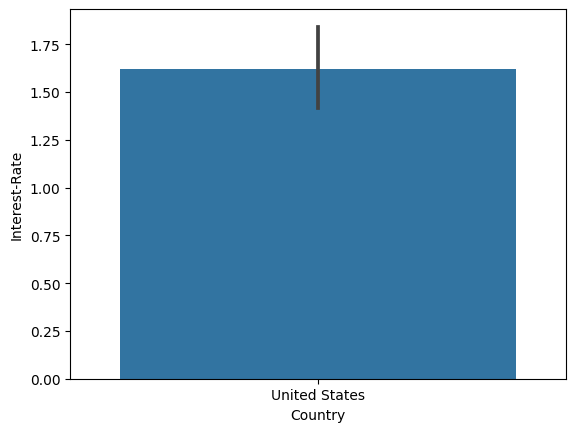

In [39]:
sns.barplot(x="Country",y="Interest-Rate" , data = df)